<div style="text-align: center; background-color: #000; color: #ffffff; padding:10px;">
    <p style="font-size: 24px;" >🚩Flagging most hateful cyberbullying tweets 🎯❌🤬</p>
</div>
 
*This project aims to use unsupervised learning to cluster cyberbullying tweets into 5 different hate-speech categories (Gender, Ethnicity, Age, Religion, and Not Cyberbullying) to further flag, using sentiment analysis techniques, the most hateful tweets among the different groups.*


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-(EDA)-📊" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-📊-1">Exploratory Data Analysis (EDA) 📊</a></span></li><li><span><a href="#Text-cleaning" data-toc-modified-id="Text-cleaning-2">Text cleaning</a></span><ul class="toc-item"><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-2.1">Vectorization</a></span></li><li><span><a href="#PCA-and-T-SNE-(Dimensionality-Reduction)" data-toc-modified-id="PCA-and-T-SNE-(Dimensionality-Reduction)-2.2">PCA and T-SNE (Dimensionality Reduction)</a></span></li></ul></li><li><span><a href="#Unsupervised-Learning---Clustering-🔍" data-toc-modified-id="Unsupervised-Learning---Clustering-🔍-3">Unsupervised Learning - Clustering 🔍</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Method--1:-K-Means-Clustering" data-toc-modified-id="Method--1:-K-Means-Clustering-3.0.1">Method  1: K-Means Clustering</a></span></li><li><span><a href="#Method-2:-Spectral-Clustering" data-toc-modified-id="Method-2:-Spectral-Clustering-3.0.2">Method 2: Spectral Clustering</a></span></li><li><span><a href="#Method-3:-Agglomerative-Clustering" data-toc-modified-id="Method-3:-Agglomerative-Clustering-3.0.3">Method 3: Agglomerative Clustering</a></span></li></ul></li><li><span><a href="#Analysis-of-misclasified-points-⚖️" data-toc-modified-id="Analysis-of-misclasified-points-⚖️-3.1">Analysis of misclasified points ⚖️</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Automatic-mapping-of-cluster-to-true-categories-based-on-word-similarity" data-toc-modified-id="Automatic-mapping-of-cluster-to-true-categories-based-on-word-similarity-3.1.0.1">Automatic mapping of cluster to true categories based on word similarity</a></span></li></ul></li></ul></li><li><span><a href="#Note------Supervised-Learning---Clasification" data-toc-modified-id="Note------Supervised-Learning---Clasification-3.2">Note ---- Supervised Learning - Clasification</a></span><ul class="toc-item"><li><span><a href="#SVM" data-toc-modified-id="SVM-3.2.1">SVM</a></span></li></ul></li></ul></li><li><span><a href="#Sentiment-Analysis-by-bullying-category-🚩" data-toc-modified-id="Sentiment-Analysis-by-bullying-category-🚩-4">Sentiment Analysis by bullying category 🚩</a></span><ul class="toc-item"><li><span><a href="#NLTK-Sentiment-Analyzer" data-toc-modified-id="NLTK-Sentiment-Analyzer-4.1">NLTK Sentiment Analyzer</a></span></li><li><span><a href="#BERT-(Advanced-Method)" data-toc-modified-id="BERT-(Advanced-Method)-4.2">BERT (Advanced Method)</a></span></li></ul></li></ul></div>

In [ ]:
# WARNING: Run this cell in a new environment if you don´t want to mess up with your current package installation
# Installing the requirements.txt for this project for optimal usage


#Uncomment the next line and run the cell

#!pip install -r requirements.txt

In [140]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import re
import time
import datetime as dt
import networkx as nx

from tqdm import tqdm
import random
import requests
from io import StringIO
from itertools import permutations, product

from yellowbrick.cluster import KElbowVisualizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.sentiment import SentimentIntensityAnalyzer


from sklearn.utils import shuffle

from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, davies_bouldin_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import silhouette_score

import scipy
from scipy.cluster import hierarchy
from scipy import stats


from transformers import pipeline

import plotly.express as px

warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lucialarraona/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lucialarraona/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lucialarraona/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lucialarraona/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lucialarraona/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [139]:
#### Freezing and creating a requirement.txt file for this project (dont uncomment)

#import pkg_resources
#import subprocess

# Get a list of installed packages and their versions
#installed_packages = [p for p in pkg_resources.working_set]

# Create a requirements.txt file
#with open('requirements.txt', 'w') as f:
#    for package in installed_packages:
#        f.write(f"{package.project_name}=={package.version}\n")

# Optionally, you can also sort the requirements alphabetically
#subprocess.check_call(['pip', 'freeze', '|', 'sort', '>', 'requirements.txt'], shell=True)


# Exploratory Data Analysis (EDA) 📊
- Data Import 
- Distribution of datapoints, exploration
- Text cleaning and Vectorization


In [104]:
# Pointer to raw file of github for data
github_raw_file_url = 'https://raw.githubusercontent.com/lucialarraona/comptools/main/Data/cyberbullying_tweets%202.csv'

# Use the requests library to get the content of the CSV file
response = requests.get(github_raw_file_url)

if response.status_code == 200:
    try:
        df = pd.read_csv(github_raw_file_url)
    except Exception as e:
        print("Failed to retrieve and load the CSV file.")
        print(e)

In [105]:
# Data Analysis
print(df.shape)
df['cyberbullying_type'].unique()

(47692, 2)


array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [106]:
category_to_drop = 'other_cyberbullying' #dropping other_cyberbullying to eliminate nuances for this project
# Filter and create a new DataFrame without the specified category
df = df[df['cyberbullying_type'] != category_to_drop]

In [107]:
############## Exploratory plots by Frederik :D 











In [108]:
# Dataset is too big, we take a slice for the first iteration of the project on CPU. We will use full dataset on HPC with GPU node.
shuffled_df = df.sample(frac=1, random_state=42)
slice_df = shuffled_df.iloc[:2000]
slice_df = slice_df.reset_index()

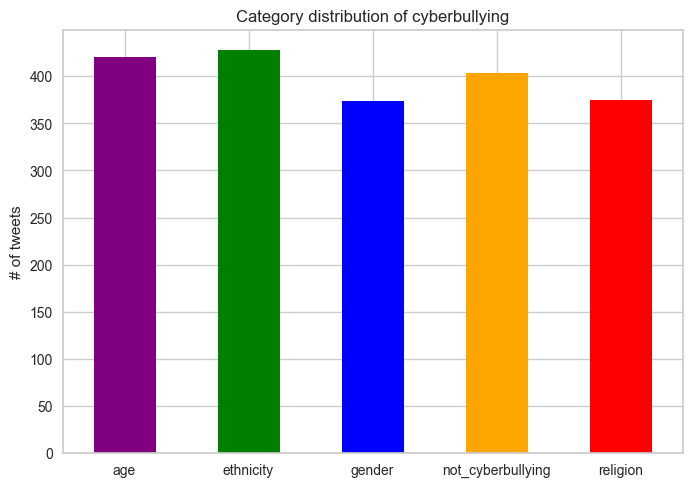

In [109]:
# Define custom colors for each category
category_colors = {
    'gender': 'blue',
    'religion': 'red',
    'ethnicity': 'green',
    'age': 'purple',
    'not_cyberbullying': 'orange',
}

# Plot the category distribution with custom colors
plot_data = slice_df['cyberbullying_type'].value_counts().sort_index()
plot_data.plot(kind='bar', rot=0, color=[category_colors.get(x, 'gray') for x in plot_data.index])

plt.title('Category distribution of cyberbullying')
plt.ylabel('# of tweets')
plt.show()

## Text cleaning 
Tweets are short sentences but include a lot of special characters, line skips and emojis, we remove all to 

In [110]:
def preprocess_tweet(text, remove_stopwords=True):
    """Preprocess tweet text data by:
        - removing URLs
        - removing mentions and hashtags
        - removing special characters
        - removing numbers
        - removing stopwords (optional)
        - transforming to lowercase
        - removing excessive whitespaces
        - replacing line separators with spaces
    Args:
        text (str): The input tweet text to clean.
        remove_stopwords (bool): Whether or not to remove stopwords (default: True).
    Returns:
        str: The cleaned tweet text.
    """
    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)
    
    # Remove mentions and hashtags (keep the words)
    text = re.sub(r'[@#]\w+', '', text)
    
    # Remove special characters and numbers
    text = re.sub('[^A-Za-z]+', ' ', text)
    
    # Replace line separators with spaces
    text = text.replace('\n', ' ').replace('\r', ' ')
    
    if remove_stopwords:
        # Tokenize
        tokens = word_tokenize(text)
        # Remove stopwords
        tokens = [w for w in tokens if w.lower() not in set(stopwords.words("english"))]
        # Join back together
        text = " ".join(tokens)
    
    # Transform to lowercase
    text = text.lower()
    
    # Remove excessive whitespaces
    text = ' '.join(text.split())
    
    return text



#Apply this function to the tweets (also measure time it takes for computational metric purposes)
t1 = time.time()
print('Starting cleaning of data')
tqdm.pandas(dynamic_ncols=True, smoothing=0.01)
#Use function preprocess_text() for every row, assign results to new column 
slice_df['cleaned'] = slice_df['tweet_text'].progress_apply(lambda x: preprocess_tweet(x, remove_stopwords=True))
print('Finished cleaning of data')
t2 = time.time()
print(f'Elapsed time for initilization: {t2-t1:.2f}s')

Starting cleaning of data


  0%|          | 9/2000 [00:00<00:23, 84.28it/s]

100%|██████████| 2000/2000 [00:09<00:00, 221.47it/s]

Finished cleaning of data
Elapsed time for initilization: 9.07s


If we did stemming problem is words like Don't would be turned to DO, which will completely change the meaning of our sentence....

In [111]:
# Example of cleaned tweet
print(slice_df['tweet_text'][100])
print(slice_df['cleaned'][100])

Why do straight AND gay men think rape jokes are funny?
straight gay men think rape jokes funny


## Vectorization

In [112]:
# Text vectorization using sklearn tfidf vectorizer to the preprocessed cleaned data
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=8, max_df=0.95)
# fit_transform applies TF-IDF to cleaned texts 
X_text = vectorizer.fit_transform(slice_df['cleaned'])
X_text.shape

(2000, 532)

## PCA and T-SNE (Dimensionality Reduction)

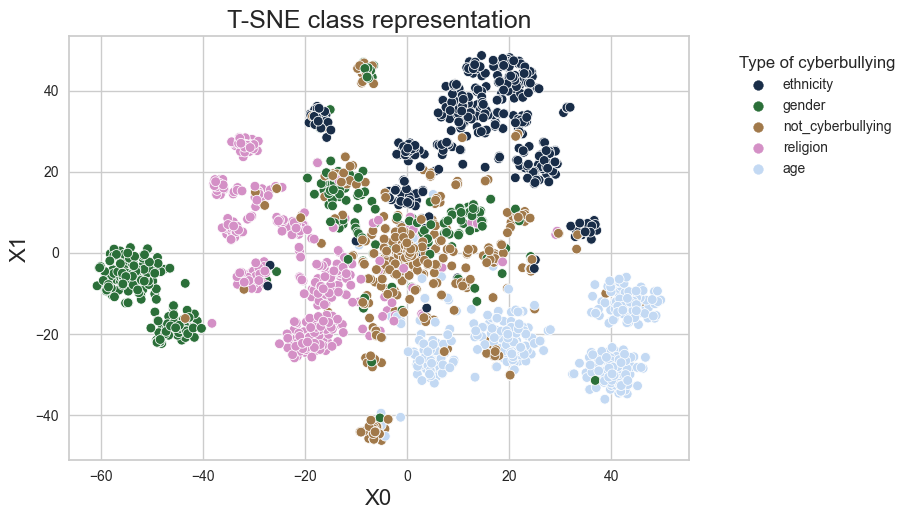

In [113]:
# Reduce the dimensionality of data points to plot the datapoint distribution
pca = PCA(n_components=50, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X_text.toarray())
X_embedded = TSNE(n_components=2, learning_rate="auto", init="random").fit_transform(pca_vecs)
                  

plt.title("T-SNE class representation", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=slice_df,
                x=X_embedded[:, 0],
                y=X_embedded[:, 1],
                hue='cyberbullying_type',
                palette="cubehelix")
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=1,
           title='Type of cyberbullying')
plt.show()

In [118]:
# Interactive plot to read tweets from each of the clusters/ categories

# Set the desired height and width for the plot
height = 800
width = 800

fig = px.scatter(slice_df, x=X_embedded[:, 0], y=X_embedded[:, 1], color='cyberbullying_type', title="T-SNE class representation", hover_data=['tweet_text'])
fig.update_xaxes(title_text="X0")
fig.update_yaxes(title_text="X1")
fig.update_layout(legend_title="Type of cyberbullying")

fig.show()


In [119]:
def get_top_keywords(X, clusters, vectorizer, n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    dff = pd.DataFrame(X.todense()).groupby(clusters).mean()  # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out()  # access tf-idf terms
    for i, r in dff.iterrows():
        print('\nCluster {}'.format(i))
         # for each row of the dataframe, find the n terms that have the highest tf idf score
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) 

In [120]:
print('The most central words for each category')
get_top_keywords(X_text, slice_df['cyberbullying_type'], vectorizer, 10)

The most central words for each category

Cluster age
middle,one,like,bullies,girl,girls,bully,bullied,high,school

Cluster ethnicity
ur,rt,white,obama,niggers,black,ass,nigger,fuck,dumb

Cluster gender
female,call,women,like,sexist,rt,joke,jokes,gay,rape

Cluster not_cyberbullying
de,andre,get,see,go,like,kat,bully,rt,bullying

Cluster religion
islamic,like,woman,terrorism,idiots,christian,islam,idiot,muslim,muslims


# Unsupervised Learning - Clustering 🔍

### Method  1: K-Means Clustering

In [121]:
class KMeans:

    def __init__(self, n_clusters, max_iter=300, random_state=1312):
        """
        Parameters
        ----------
        n_clusters : INT
            Number of clusters for K-means
        max_iter : INT, optional
            Number of iterations run by K-means. The default is 300.
        random_state : INT, optional
            Random state for initilization. Used for replication.

        Returns
        -------
        None.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initCentroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def getCentroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def getDist(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = np.linalg.norm(X - centroids[k, :], axis=1) #default is frobenius norm, which is equivilant to 2-norm for vectors
            distance[:, k] = np.square(row_norm)
        return distance
    
    def fit(self, X):
        self.centroids = self.initCentroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.getDist(X, old_centroids)
            self.labels = np.argmin(distance, axis=1)
            self.centroids = self.getCentroids(X, self.labels)
            if np.all(old_centroids == self.centroids): #If no updates are done
                break

    def predict(self, X):
        distance = self.getDist(X, self.centroids)
        return np.argmin(distance,axis=1)

In [122]:
### Using own K-means model
kmeans = KMeans(n_clusters=5, max_iter=300, random_state=42)
# fit the model
kmeans.fit(X_text.toarray())
# store cluster labels in a variable
clusters_kmeans = kmeans.predict(X_text.toarray())

print(clusters_kmeans.shape)
#add a column with clusters assigned by kmeans
slice_df['cluster_kmeans_own'] = clusters_kmeans

(2000,)


In [123]:
#### Using Sklearn kmeans 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_text.toarray())
slice_df['cluster_kmeans'] = kmeans.labels_

In [124]:
slice_df

,index,tweet_text,cyberbullying_type,cleaned,cluster_kmeans_own,cluster_kmeans
0,40207,I couldn't give two fuck on what niggers think...,ethnicity,give two fuck niggers think still getting band...,4,2
1,13098,@Dreysander1 Absolutely.,gender,absolutely,0,1
2,655,Pq vc dorme tarde &gt;&gt;&gt;&gt; bullying,not_cyberbullying,pq vc dorme tarde gt gt gt gt bullying,0,1
3,5388,@Phum_Ngcobo eyi buti I'm struggling with dis ...,not_cyberbullying,eyi buti struggling dis twitter ting bbm cnt w...,0,1
4,20795,If you think that the actions of the followers...,religion,think actions followers religion represent thr...,0,1
...,...,...,...,...,...,...
1995,6188,Woo hoo go you humble girls #MKR,not_cyberbullying,woo hoo go humble girls,0,0
1996,42411,Same. Then that incident introduced me to raci...,ethnicity,incident introduced racism catholic school got...,1,1
1997,6596,@watan71969 @s_rsantorini630 @pari_passu Seen ...,not_cyberbullying,seen crap lies example never million american ...,0,1
1998,10008,@Deanofcomedy nice try. US comedians make rape...,gender,nice try us comedians make rape racist gay jok...,3,3


In [125]:
print('The most central words for each category')
get_top_keywords(X_text, kmeans.labels_, vectorizer, 10)

The most central words for each category

Cluster 0
middle,one,like,bullies,girl,girls,bully,bullied,high,school

Cluster 1
idiots,right,one,islam,bullying,idiot,muslim,people,muslims,like

Cluster 2
shit,fucking,bitch,rt,obama,niggers,ass,nigger,dumb,fuck

Cluster 3
makes,men,like,making,funny,people,joke,jokes,gay,rape

Cluster 4
job,woman,got,really,islam,girls,hate,women,sexist,rt


In [127]:

# Set the desired height and width for the plot
height = 800
width = 800

fig = px.scatter(slice_df, x=X_embedded[:, 0], y=X_embedded[:, 1], color='cluster_kmeans', title="T-SNE class representation", hover_data=['tweet_text'])
fig.update_xaxes(title_text="X0")
fig.update_yaxes(title_text="X1")
fig.update_layout(legend_title="Type of cyberbullying")

fig.show()

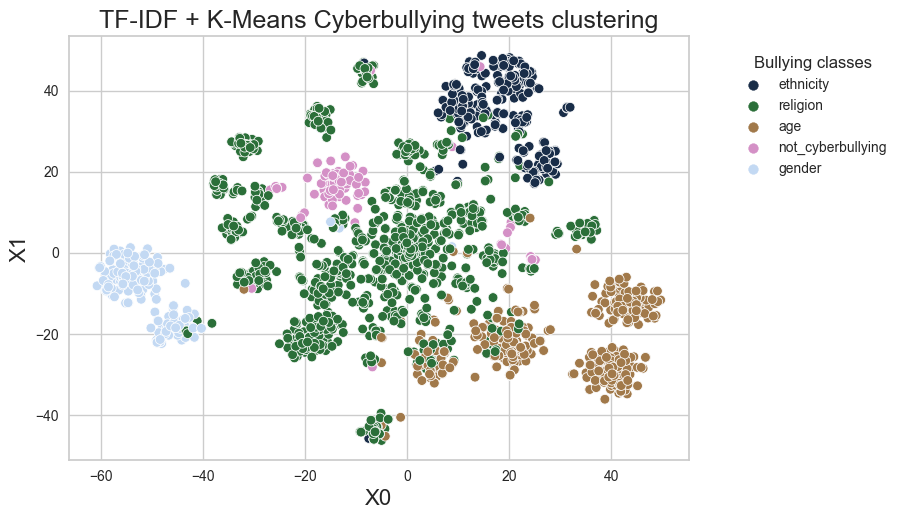

In [128]:
cluster_map_kmeans = {
    0: "age",
    1: "religion",
    2: "ethnicity",
    3: "gender",
    4: "not_cyberbullying"
}
# apply mapping
slice_df['cluster_mapped_kmeans'] = slice_df['cluster_kmeans'].map(cluster_map_kmeans)

plt.title("TF-IDF + K-Means Cyberbullying tweets clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=slice_df,
                x=X_embedded[:, 0],
                y=X_embedded[:, 1],
                hue='cluster_mapped_kmeans',
                palette="cubehelix")
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=1,
           title='Bullying classes')
plt.show()

In [129]:
# Set the desired height and width for the plot
height = 800
width = 800

fig = px.scatter(slice_df, x=X_embedded[:, 0], y=X_embedded[:, 1], color='cluster_mapped_kmeans', title="T-SNE class representation", hover_data=['tweet_text'])
fig.update_xaxes(title_text="X0")
fig.update_yaxes(title_text="X1")
fig.update_layout(legend_title="Type of cyberbullying")

fig.show()

It does an OK job. Only not_cyberbulling is absorbed highly by the religion category. We will evaluate the misclassifications on an upcoming section.


### Method 2: Spectral Clustering

In [54]:
# Initialize SpectralClustering
n_clusters = 5
spectral = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors')

# Fit the model to the TF-IDF features
spectral_cluster_labels = spectral.fit(X_text)

# Retrieve the cluster labels
clusters_spectral = spectral.labels_

# Add the cluster labels to your DataFrame
slice_df['cluster_spectral'] = clusters_spectral

In [55]:
slice_df

,index,tweet_text,cyberbullying_type,cleaned,cluster_kmeans_own,cluster_kmeans,cluster_mapped_kmeans,cluster_spectral
0,40207,I couldn't give two fuck on what niggers think...,ethnicity,give two fuck niggers think still getting band...,1,2,ethnicity,1
1,13098,@Dreysander1 Absolutely.,gender,absolutely,0,1,religion,1
2,655,Pq vc dorme tarde &gt;&gt;&gt;&gt; bullying,not_cyberbullying,pq vc dorme tarde gt gt gt gt bullying,0,1,religion,1
3,5388,@Phum_Ngcobo eyi buti I'm struggling with dis ...,not_cyberbullying,eyi buti struggling dis twitter ting bbm cnt w...,0,1,religion,1
4,20795,If you think that the actions of the followers...,religion,think actions followers religion represent thr...,0,1,religion,1
...,...,...,...,...,...,...,...,...
1995,6188,Woo hoo go you humble girls #MKR,not_cyberbullying,woo hoo go humble girls,4,0,age,1
1996,42411,Same. Then that incident introduced me to raci...,ethnicity,incident introduced racism catholic school got...,0,1,religion,1
1997,6596,@watan71969 @s_rsantorini630 @pari_passu Seen ...,not_cyberbullying,seen crap lies example never million american ...,0,1,religion,1
1998,10008,@Deanofcomedy nice try. US comedians make rape...,gender,nice try us comedians make rape racist gay jok...,0,3,gender,1


### Method 3: Agglomerative Clustering

Text(0.5, 1.0, 'Dataset dendrogram')

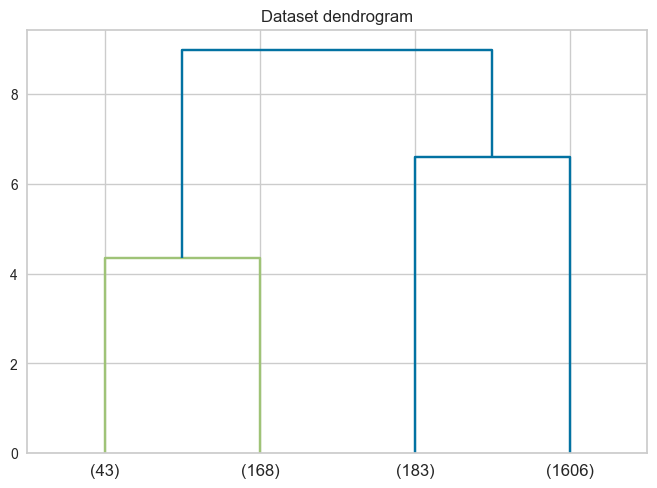

In [43]:
dendro = hierarchy.dendrogram(hierarchy.linkage(X_text.toarray(), method='ward'), truncate_mode='level',p=1)
plt.title('Dataset dendrogram')

In [62]:
# We cannot use truncated SVD because we loose way to much information. And the clustering would be shit. Using the full vectorized dataset we get that the optimal
# number of clusters is 5, which corresponds with the number of categories we are aiming for. 


######### Evaluate the optimal number of clusters by silhouette score ########
range_n_clusters = list(range(2, 10))  # Example range from 2 to 9
best_score = -1
best_n_clusters = 0

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_text.toarray())
    score = silhouette_score(X_text.toarray(), preds)

    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters


print(f'The number of optimal clusters for agglomerative clustering according to the silhouette score is {best_n_clusters} ')

# Final model with the optimal number of clusters
final_agglomerative = AgglomerativeClustering(n_clusters=best_n_clusters, affinity='euclidean',linkage='ward')
final_clusters_agglo = final_agglomerative.fit_predict(X_text.toarray())
slice_df['cluster_agglo'] = final_clusters_agglo

The number of optimal clusters for agglomerative clustering according to the silhouette score is 5 


In [63]:
slice_df

,index,tweet_text,cyberbullying_type,cleaned,cluster_kmeans_own,cluster_kmeans,cluster_mapped_kmeans,cluster_spectral,cluster_agglo
0,40207,I couldn't give two fuck on what niggers think...,ethnicity,give two fuck niggers think still getting band...,1,2,ethnicity,1,3
1,13098,@Dreysander1 Absolutely.,gender,absolutely,0,1,religion,1,0
2,655,Pq vc dorme tarde &gt;&gt;&gt;&gt; bullying,not_cyberbullying,pq vc dorme tarde gt gt gt gt bullying,0,1,religion,1,3
3,5388,@Phum_Ngcobo eyi buti I'm struggling with dis ...,not_cyberbullying,eyi buti struggling dis twitter ting bbm cnt w...,0,1,religion,1,2
4,20795,If you think that the actions of the followers...,religion,think actions followers religion represent thr...,0,1,religion,1,0
...,...,...,...,...,...,...,...,...,...
1995,6188,Woo hoo go you humble girls #MKR,not_cyberbullying,woo hoo go humble girls,4,0,age,1,1
1996,42411,Same. Then that incident introduced me to raci...,ethnicity,incident introduced racism catholic school got...,0,1,religion,1,1
1997,6596,@watan71969 @s_rsantorini630 @pari_passu Seen ...,not_cyberbullying,seen crap lies example never million american ...,0,1,religion,1,0
1998,10008,@Deanofcomedy nice try. US comedians make rape...,gender,nice try us comedians make rape racist gay jok...,0,3,gender,1,2


In [64]:
get_top_keywords(X_text, final_clusters_agglo, vectorizer, 10)


Cluster 0
black,school,islam,right,idiot,muslim,people,muslims,like,rt

Cluster 1
got,one,bullies,like,girl,girls,bully,bullied,high,school

Cluster 2
like,make,funny,makes,making,people,joke,jokes,gay,rape

Cluster 3
stupid,fucking,bitch,rt,obama,niggers,ass,nigger,dumb,fuck

Cluster 4
bully,yo,kid,goes,via,etc,na,com,de,bullying


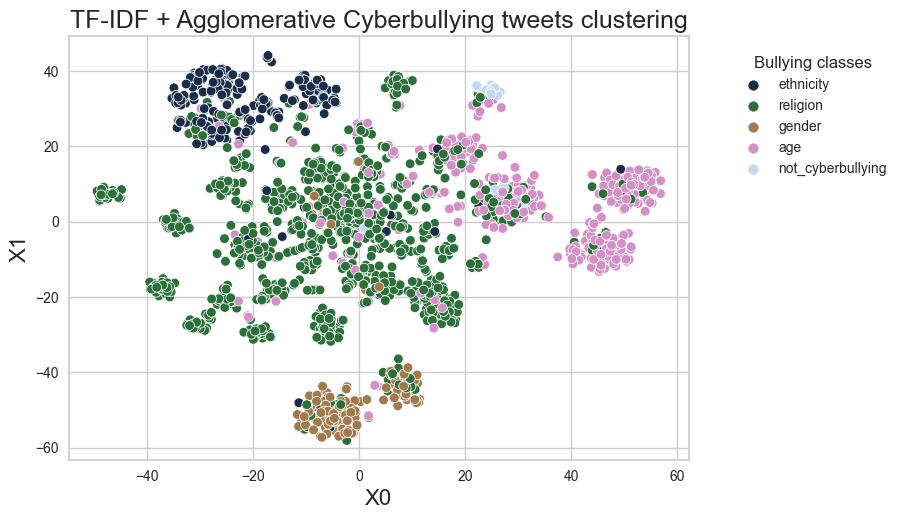

In [65]:
cluster_map_kmeans = {
    0: "religion",
    1: "age",
    2: "gender",
    3: "ethnicity",
    4: "not_cyberbullying"
}
# apply mapping
slice_df['cluster_mapped_agglomerative'] = slice_df['cluster_agglo'].map(cluster_map_kmeans)

plt.title("TF-IDF + Agglomerative Cyberbullying tweets clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=slice_df,
                x=X_embedded[:, 0],
                y=X_embedded[:, 1],
                hue='cluster_mapped_agglomerative',
                palette="cubehelix")
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=1,
           title='Bullying classes')
plt.show()

## Analysis of misclasified points ⚖️

- Until now, we are mapping the clusters to the true categories manually by using the 10 top words on each cluster.
- To automize this process, we thought of calculating both the top words per true category and the top words per cluster for each of the clustering methods. And then assign each cluster the true category wiht the highest similarity.


#### Automatic mapping of cluster to true categories based on word similarity

In [68]:
slice_df.head()

,index,tweet_text,cyberbullying_type,cleaned,cluster_kmeans_own,cluster_kmeans,cluster_mapped_kmeans,cluster_spectral,cluster_agglo,cluster_mapped_agglomerative
0,40207,I couldn't give two fuck on what niggers think...,ethnicity,give two fuck niggers think still getting band...,1,2,ethnicity,1,3,ethnicity
1,13098,@Dreysander1 Absolutely.,gender,absolutely,0,1,religion,1,0,religion
2,655,Pq vc dorme tarde &gt;&gt;&gt;&gt; bullying,not_cyberbullying,pq vc dorme tarde gt gt gt gt bullying,0,1,religion,1,3,ethnicity
3,5388,@Phum_Ngcobo eyi buti I'm struggling with dis ...,not_cyberbullying,eyi buti struggling dis twitter ting bbm cnt w...,0,1,religion,1,2,gender
4,20795,If you think that the actions of the followers...,religion,think actions followers religion represent thr...,0,1,religion,1,0,religion


In [66]:
def calculate_top_words_per_category(data, categories, vectorizer, n_words):
    top_words = {}
    for category in categories:
        # Filter data for each category
        category_data = data[data['cyberbullying_type'] == category]
        # Calculate TF-IDF and get top words
        tfidf_matrix = vectorizer.transform(category_data['cleaned'])
        sum_tfidf = np.sum(tfidf_matrix, axis=0)
        # If it's a sparse matrix, convert to a dense array
        if isinstance(sum_tfidf, np.matrix):
            sum_tfidf = sum_tfidf.A1
        sorted_indices = np.argsort(sum_tfidf)[::-1][:n_words]
        top_category_words = np.array(vectorizer.get_feature_names_out())[sorted_indices]
        top_words[category] = set(top_category_words.tolist())  # Convert array to list before creating a set
    return top_words

def calculate_top_words_per_cluster(X, clusters, vectorizer, n_words):
    top_cluster_words = {}
    for i in range(np.max(clusters) + 1):
        # Find the indices of rows in X that belong to the current cluster
        cluster_indices = np.where(clusters == i)
        # Sum the TF-IDF vectors for each word in the cluster
        sum_tfidf = np.sum(X[cluster_indices], axis=0)
        # Convert to a dense array if needed
        if isinstance(sum_tfidf, np.matrix):
            sum_tfidf = sum_tfidf.A1
        # Get the top word indices sorted by TF-IDF value
        top_indices = np.argsort(sum_tfidf)[::-1][:n_words]
        # Retrieve the top words
        top_words_list = np.array(vectorizer.get_feature_names_out())[top_indices]
        top_cluster_words[i] = set(top_words_list)
    return top_cluster_words

In [67]:
# Retrieve again all top words per category and cluster 

top_words_category = calculate_top_words_per_category(slice_df, slice_df['cyberbullying_type'].unique(), vectorizer, 20)
top_words_cluster_kmeans = calculate_top_words_per_cluster(X_text, slice_df['cluster_kmeans'], vectorizer, 20)
top_words_cluster_spectral = calculate_top_words_per_cluster(X_text, slice_df['cluster_spectral'], vectorizer, 20)
top_words_cluster_agglo = calculate_top_words_per_cluster(X_text, final_clusters_agglo, vectorizer, 20)

In [69]:
def match_clusters_to_categories(cluster_top_words, category_top_words, unique_categories):
    matches = {}
    used_categories = set()
    cluster_ids = list(cluster_top_words.keys())

    # Sort clusters by the sum of all their similarity scores to prioritize those with higher overall similarity
    cluster_ids.sort(key=lambda cid: sum(
        len(cluster_top_words[cid].intersection(category_top_words[cat])) / len(cluster_top_words[cid].union(category_top_words[cat]))
        for cat in category_top_words
    ), reverse=True)

    while cluster_ids:
        cluster_id = cluster_ids.pop(0)
        cluster_words = cluster_top_words[cluster_id]
        similarity_scores = {}

        # Calculate similarity scores for all categories against this cluster
        for category, category_words in category_top_words.items():
            intersection = cluster_words.intersection(category_words)
            union = cluster_words.union(category_words)
            jaccard_similarity = len(intersection) / len(union)
            similarity_scores[category] = jaccard_similarity

        # Sort categories by similarity score, prioritize unused categories
        sorted_categories = sorted(similarity_scores, key=lambda cat: (cat not in used_categories, similarity_scores[cat]), reverse=True)
        best_match_category = sorted_categories[0]
        matches[cluster_id] = best_match_category
        used_categories.add(best_match_category)

        # If all categories are used, allow reusing categories for remaining clusters
        if len(used_categories) == len(unique_categories):
            used_categories.clear()

    return matches

In [70]:
# Extract the unique categories from your data
unique_categories = np.unique(slice_df['cyberbullying_type'])    
matches_kmeans = match_clusters_to_categories(top_words_cluster_kmeans, top_words_category,unique_categories)
matches_spectral = match_clusters_to_categories(top_words_cluster_spectral, top_words_category,unique_categories)
matches_agglo = match_clusters_to_categories(top_words_cluster_agglo, top_words_category,unique_categories)


# Mapping dictionaries for K-Means and Spectral Clustering
cluster_map_kmeans = {cluster: category for cluster, category in matches_kmeans.items()}
cluster_map_spectral = {cluster: category for cluster, category in matches_spectral.items()}
cluster_map_agglo = {cluster: category for cluster, category in matches_agglo.items()}

print('Cluster mappings for kmeans:')
print(cluster_map_kmeans)

print('Cluster mappings for spectral:')
print(cluster_map_spectral)

print('Cluster mappings for Agglo:')
print(cluster_map_agglo)

# Apply the mappings
slice_df['cluster_mapped_kmeans'] = slice_df['cluster_kmeans'].map(cluster_map_kmeans)
slice_df['cluster_mapped_spectral'] = slice_df['cluster_spectral'].map(cluster_map_spectral)
slice_df['cluster_mapped_agglo'] = slice_df['cluster_agglo'].map(cluster_map_agglo)

Cluster mappings for kmeans:
{0: 'age', 1: 'religion', 4: 'gender', 2: 'ethnicity', 3: 'not_cyberbullying'}
Cluster mappings for spectral:
{1: 'age', 3: 'ethnicity', 4: 'gender', 2: 'not_cyberbullying', 0: 'religion'}
Cluster mappings for Agglo:
{1: 'age', 0: 'religion', 3: 'ethnicity', 2: 'gender', 4: 'not_cyberbullying'}


In [71]:
# Find the correctly classified rows for K-Means
correct_list_kmeans = slice_df[slice_df['cyberbullying_type'] == slice_df['cluster_mapped_kmeans']].index.tolist()
# Filter to only include correctly classified rows for K-Means
correctly_classified_kmeans = slice_df.loc[correct_list_kmeans]

# Find the correctly classified rows for Spectral Clustering
correct_list_spectral = slice_df[slice_df['cyberbullying_type'] == slice_df['cluster_mapped_spectral']].index.tolist()
# Filter to only include correctly classified rows for Spectral Clustering
correctly_classified_spectral = slice_df.loc[correct_list_spectral]

# Find the correctly classified rows for Agglomerative Clustering
correct_list_agglo = slice_df[slice_df['cyberbullying_type'] == slice_df['cluster_mapped_agglo']].index.tolist()
# Filter to only include correctly classified rows for Agglomerative Clustering
correctly_classified_agglo = slice_df.loc[correct_list_agglo]

# Calculate the accuracy for both methods
accuracy_kmeans = len(correctly_classified_kmeans) / len(slice_df)
accuracy_spectral = len(correctly_classified_spectral) / len(slice_df)
accuracy_agglo = len(correctly_classified_agglo) / len(slice_df)
print(f'Accuracy of K-Means clustering: {accuracy_kmeans:.2%}')
print(f'Accuracy of Spectral clustering: {accuracy_spectral:.2%}')
print(f'Accuracy of Agglomerative Clustering: {accuracy_agglo:.2%}')

Accuracy of K-Means clustering: 52.85%
Accuracy of Spectral clustering: 27.60%
Accuracy of Agglomerative Clustering: 54.35%


In [74]:
## Aditional tests and checks to evaluate every combination of mapping for each method

def evaluate_mappings(true_labels, predicted_clusters, categories, num_samples=None):
    # Convert to lists for consistent indexing
    true_labels = list(true_labels)
    predicted_clusters = list(predicted_clusters)

    # Generate all unique clusters
    unique_clusters = sorted(set(predicted_clusters))

    # Generate permutations for the number of unique categories
    # and then product combinations if there are more clusters than categories
    if len(unique_clusters) <= len(categories):
        category_combinations = list(permutations(categories, len(unique_clusters)))
    else:
        # First, assign one category to each cluster
        base_permutations = list(permutations(categories))
        # Then, for the remaining clusters, allow categories to repeat
        additional_combinations = list(product(categories, repeat=len(unique_clusters) - len(categories)))
        # Combine the permutations with the additional combinations
        category_combinations = [perm + comb for perm in base_permutations for comb in additional_combinations]

    # If num_samples is specified and less than the total number of combinations, sample a subset
    if num_samples and num_samples < len(category_combinations):
        category_combinations = random.sample(category_combinations, num_samples)

    best_mapping = None
    best_accuracy = 0

    # Test each combination
    for category_comb in category_combinations:
        # Create a mapping for this combination
        mapping = {cluster: category for cluster, category in zip(unique_clusters, category_comb)}
        # Map the predicted clusters to categories using this mapping
        mapped_predictions = [mapping.get(cluster, None) for cluster in predicted_clusters]
        # Calculate the accuracy of this mapping
        accuracy = sum(1 for i, prediction in enumerate(mapped_predictions) if prediction == true_labels[i]) / len(true_labels)
        # If this is the best mapping so far, remember it
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_mapping = mapping

    return best_mapping, best_accuracy



# Generate the actual true labels and predicted clusters
actual_true_labels = slice_df['cyberbullying_type'].values
predicted_clusters_kmeans = slice_df['cluster_kmeans'].values
predicted_clusters_spectral = slice_df['cluster_spectral'].values

# Optionally shuffle the data if computational resources are limited
# This is a strategy to get a diverse subset if you can't afford to test all permutations
actual_true_labels, predicted_clusters_kmeans, predicted_clusters_spectral = shuffle(
    actual_true_labels, 
    predicted_clusters_kmeans, 
    predicted_clusters_spectral, 
    random_state=42
)

# Assuming `actual_true_labels` contains your true class labels
unique_categories = np.unique(actual_true_labels)

# Evaluate mappings for K-Means
best_mapping_kmeans, best_accuracy_kmeans = evaluate_mappings(
    actual_true_labels, 
    predicted_clusters_kmeans, 
    unique_categories,  # Make sure to pass the list of unique categories
    num_samples=100000  # Optional: adjust as needed or remove if not using sampling
)

# Evaluate mappings for Spectral Clustering
best_mapping_spectral, best_accuracy_spectral = evaluate_mappings(
    actual_true_labels, 
    predicted_clusters_spectral, 
    unique_categories,  # Make sure to pass the list of unique categories
    num_samples=100000  # Optional: adjust as needed or remove if not using sampling
)

# Evaluate mappings for Agglomerative Clustering
best_mapping_agglo, best_accuracy_agglo = evaluate_mappings(
    actual_true_labels, 
    final_clusters_agglo, 
    unique_categories,  # Make sure to pass the list of unique categories
    num_samples=100000  # Optional: adjust as needed or remove if not using sampling
)
# Print the results
print(f'Best Mapping for K-Means: {best_mapping_kmeans}')
print(f'Best Accuracy for K-Means: {best_accuracy_kmeans:.2%}')
print(f'Best Mapping for Spectral Clustering: {best_mapping_spectral}')
print(f'Best Accuracy for Spectral Clustering: {best_accuracy_spectral:.2%}')
print(f'Best Mapping for Agglomerative Clustering: {best_mapping_agglo}')
print(f'Best Accuracy for Agglomerative Clustering: {best_accuracy_agglo:.2%}')


Best Mapping for K-Means: {0: 'age', 1: 'religion', 2: 'ethnicity', 3: 'gender', 4: 'not_cyberbullying'}
Best Accuracy for K-Means: 61.40%
Best Mapping for Spectral Clustering: {0: 'not_cyberbullying', 1: 'age', 2: 'gender', 3: 'ethnicity', 4: 'religion'}
Best Accuracy for Spectral Clustering: 29.25%
Best Mapping for Agglomerative Clustering: {0: 'age', 1: 'religion', 2: 'gender', 3: 'ethnicity', 4: 'not_cyberbullying'}
Best Accuracy for Agglomerative Clustering: 21.95%


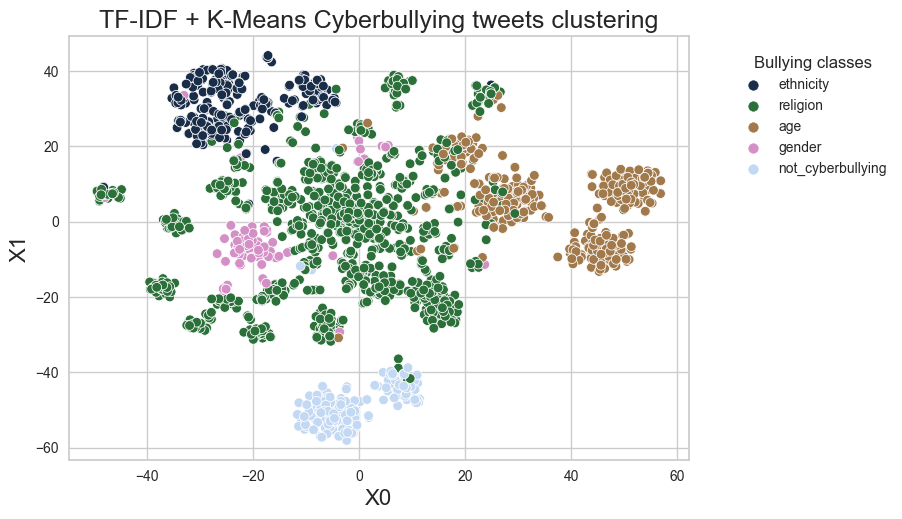

In [75]:
cluster_map_kmeans_auto = cluster_map_kmeans
cluster_map_spectral_auto = cluster_map_spectral

# apply mapping
slice_df['cluster_mapped_kmeans'] = slice_df['cluster_kmeans'].map(cluster_map_kmeans)

plt.title("TF-IDF + K-Means Cyberbullying tweets clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=slice_df,
                x=X_embedded[:, 0],
                y=X_embedded[:, 1],
                hue='cluster_mapped_kmeans',
                palette="cubehelix")
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=1,
           title='Bullying classes')
plt.show()

943


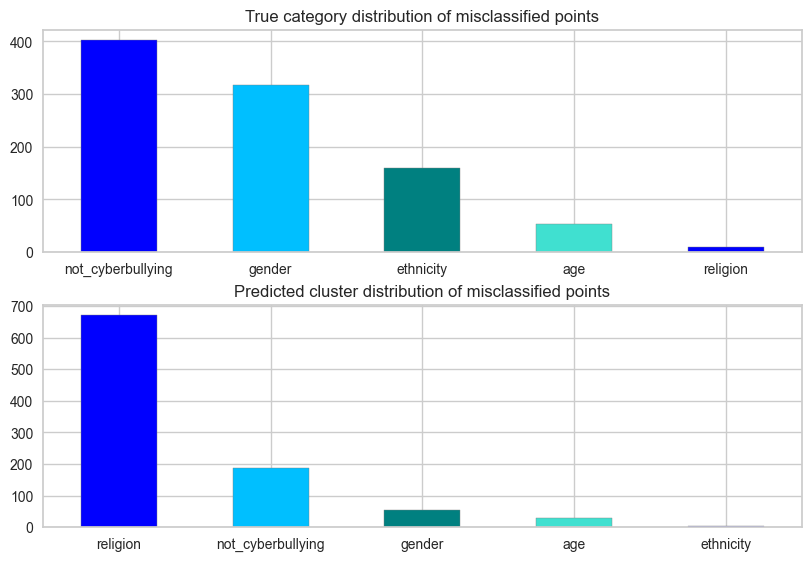

In [76]:

#Find the list of misclassified indexes 
diff_list_kmeans = np.where(slice_df['cyberbullying_type']!= slice_df['cluster_mapped_kmeans'])
misclassified_kmeans = slice_df[slice_df.index.isin(diff_list_kmeans[0])]
print(len(diff_list_kmeans[0]))



###### Figure for visuaization of misclasification #########

figs, ax = plt.subplots(2,layout="constrained")
#Distribution of misclassified points - true category
misclassified_kmeans['cyberbullying_type'].value_counts().plot(ax=ax[0],
                                   kind='bar',
                                   rot=0,
                                   color=["blue","deepskyblue","teal","turquoise"],
                                   edgecolor=["gray"],
                                   title = 'True category distribution of misclassified points' )


#Distribution of misclassified points - predicted cluster
misclassified_kmeans['cluster_mapped_kmeans'].value_counts().plot(ax=ax[1],
                                   kind='bar',
                                   rot=0,
                                   color=["blue","deepskyblue","teal","turquoise"],
                                   edgecolor=["gray"],
                                   title = 'Predicted cluster distribution of misclassified points' )

#plt.savefig('outlier_anal.png', dpi=300)
None

In [78]:
# Assuming you have the true labels in 'true_labels' and cluster labels in 'kmeans_labels'
true_labels = slice_df['cyberbullying_type']
labels = slice_df['cluster_mapped_kmeans']

# Calculate clustering evaluation metrics
homogeneity = homogeneity_score(true_labels, labels)
completeness = completeness_score(true_labels, labels)
v_measure = v_measure_score(true_labels, labels)
davies_bouldin = davies_bouldin_score(X_text.toarray(), labels)


# Print the calculated metrics
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'V-Measure: {v_measure}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Homogeneity: 0.464118428993487
Completeness: 0.5680500337116147
V-Measure: 0.510851665715457
Davies-Bouldin Index: 4.581506034011285


## Note ---- Supervised Learning - Clasification
- SVM (Support Vector Machine)

### SVM

In [57]:
# Now we'll vectorize the 'tweet_text' column of slice_df using the previously mentioned TF-IDF parameters
# Since we don't have the actual 'cleaned' column, we use 'tweet_text' for the purpose of this demonstration
X_text_slice = X_text

label_encoder = LabelEncoder()
# Encode the labels for the sliced dataset
y_labels_slice = label_encoder.fit_transform(slice_df['cyberbullying_type'])

# Check the shapes of the features and labels
X_text_slice.shape, y_labels_slice.shape

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text_slice, y_labels_slice, test_size=0.2, random_state=42)

# Initialize the SVM classifier with a linear kernel
svm = SVC(kernel='linear', random_state=42)

# Train the SVM classifier on the training data
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

accuracy_svm, conf_matrix_svm, report_svm


(0.8725,
 array([[79,  0,  0,  6,  0],
        [ 0, 87,  0,  1,  0],
        [ 0,  2, 60, 16,  0],
        [ 6,  2,  2, 67,  5],
        [ 0,  0,  1, 10, 56]]),
 '              precision    recall  f1-score   support\n\n           0       0.93      0.93      0.93        85\n           1       0.96      0.99      0.97        88\n           2       0.95      0.77      0.85        78\n           3       0.67      0.82      0.74        82\n           4       0.92      0.84      0.88        67\n\n    accuracy                           0.87       400\n   macro avg       0.89      0.87      0.87       400\nweighted avg       0.88      0.87      0.87       400\n')

#  Sentiment Analysis by bullying category 🚩
The aim of this section is to flag the most "hateful" tweets according to the text information, both with the nltk sentiment analyzer and a more advanced method like BERT (transformer)

## NLTK Sentiment Analyzer

In [80]:
# Initialize VADER's SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to get the VADER sentiment score
def get_vader_sentiment(tweet):
    return sid.polarity_scores(tweet)['compound']

# Apply VADER sentiment analysis to each correctly classified tweet
correctly_classified_kmeans['vader_sentiment_score'] = correctly_classified_kmeans['cleaned'].apply(get_vader_sentiment)

# Find the most negative tweet in each cluster among the correctly classified
most_negative_tweets_vader = {}

for cluster_label, cluster_name in cluster_map_kmeans.items():
    cluster_data = correctly_classified_kmeans[correctly_classified_kmeans['cluster_mapped_kmeans'] == cluster_name]
    if not cluster_data.empty:
        most_negative_tweet = cluster_data.loc[cluster_data['vader_sentiment_score'].idxmin()]
        most_negative_tweets_vader[cluster_name] = most_negative_tweet

# Create a list to display the results later
negative_tweet_info = []

# Display the most negative tweet for each cluster among the correctly classified
for cluster_name, tweet_data in most_negative_tweets_vader.items():
    negative_tweet_info.append({
        "Cluster": cluster_name,
        "Tweet": tweet_data['tweet_text'],
        "VADER Sentiment Score": tweet_data['vader_sentiment_score']
    })

negative_tweet_info

[{'Cluster': 'age',
  'Tweet': 'Angry! Under extreme marginalization and heavy family burden, nearly dead by nelsoncat production. While school assists HIM to hide the truth and harm me till March 2020. Till now, coordinating gang of public bully me. Bad intention will forecast the evil purpose of fake HKP',
  'VADER Sentiment Score': -0.981},
 {'Cluster': 'religion',
  'Tweet': 'brother he never stood for justice!your love for eskender shodowed you to see his bad deed!he is racist man who supported the burning of mesjids&amp;muslim belongings live on stream media&amp;also made petition to lable 30 milion qeerroos as terrorist!he is idiot&amp;racist man!',
  'VADER Sentiment Score': -0.976},
 {'Cluster': 'gender',
  'Tweet': 'RT @AllstateJackie: Antis will stop treating blocks as trophies as soon as feminists stop treating blocks as arguments. 🐸☕ #GamerGate',
  'VADER Sentiment Score': -0.836},
 {'Cluster': 'ethnicity',
  'Tweet': 'no... bitch fuck dyke bitch fuck shit nigger pussy ass

## BERT (Advanced Method)

In [90]:
classification = pipeline('sentiment-analysis', model = "bert-base-uncased")
type(classification)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

transformers.pipelines.text_classification.TextClassificationPipeline

In [91]:
# Since BERT uses it's own embeeding (positional embedding) and tokenization then we can apply the sentiment analysis directly to the text without cleaning 
texts = correctly_classified_kmeans['tweet_text'].to_list()
predictions = classification(texts)
predictions[:10]

[{'label': 'LABEL_0', 'score': 0.5664649605751038},
 {'label': 'LABEL_1', 'score': 0.5887596011161804},
 {'label': 'LABEL_1', 'score': 0.5119946599006653},
 {'label': 'LABEL_1', 'score': 0.554020345211029},
 {'label': 'LABEL_0', 'score': 0.581193208694458},
 {'label': 'LABEL_1', 'score': 0.5444433689117432},
 {'label': 'LABEL_1', 'score': 0.511916995048523},
 {'label': 'LABEL_0', 'score': 0.5246632695198059},
 {'label': 'LABEL_1', 'score': 0.5452079772949219},
 {'label': 'LABEL_0', 'score': 0.5102285742759705}]

In [92]:
correctly_classified_kmeans['sentiment_bert'] = [entry['score'] for entry in predictions]
correctly_classified_kmeans['label_bert'] = [entry['label'] for entry in predictions]
correctly_classified_kmeans.head(2)

,index,tweet_text,cyberbullying_type,cleaned,cluster_kmeans_own,cluster_kmeans,cluster_mapped_kmeans,cluster_spectral,cluster_agglo,cluster_mapped_agglomerative,cluster_mapped_spectral,cluster_mapped_agglo,vader_sentiment_score,sentiment_bert,label_bert
0,40207,I couldn't give two fuck on what niggers think...,ethnicity,give two fuck niggers think still getting band...,1,2,ethnicity,1,3,ethnicity,age,ethnicity,-0.8934,0.566465,LABEL_0
4,20795,If you think that the actions of the followers...,religion,think actions followers religion represent thr...,0,1,religion,1,0,religion,age,religion,-0.5106,0.588760,LABEL_1


In [93]:
# Find the most negative tweet in each cluster among the correctly classified
most_negative_tweets_bert = {}

for cluster_label, cluster_name in cluster_map_kmeans.items():
    cluster_data = correctly_classified_kmeans[correctly_classified_kmeans['cluster_mapped_kmeans'] == cluster_name]
    if not cluster_data.empty:
        most_negative_tweet = cluster_data.loc[cluster_data['sentiment_bert'].idxmin()]
        most_negative_tweets_vader[cluster_name] = most_negative_tweet

# Create a list to display the results later
negative_tweet_info = []

# Display the most negative tweet for each cluster among the correctly classified
for cluster_name, tweet_data in most_negative_tweets_vader.items():
    negative_tweet_info.append({
        "Cluster": cluster_name,
        "Tweet": tweet_data['tweet_text'],
        "BERT Sentiment Score": tweet_data['sentiment_bert']
    })

negative_tweet_info

[{'Cluster': 'age',
  'Tweet': 'Laughing pretty hard at the girls from my high school reposting the “if you notice someone getting bullied please be their friend” post like they WERENT THE BIGGEST BULLIES IN HIGH SCHOOL. We see you, we remember.',
  'BERT Sentiment Score': 0.500093936920166},
 {'Cluster': 'religion',
  'Tweet': 'Is that what you think ISIS is doing? Establishing “Our way is the only way”? That means u don’t know the first thing about islamic terrorism. Go find out what they want. Take as much time as u need. Let’s see if u can find out. I’ll wait',
  'BERT Sentiment Score': 0.5003967881202698},
 {'Cluster': 'gender',
  'Tweet': 'RT @ChopraTP: #GermanProfessor gives meaning to term FemiNazi.Doesn\'t hire "Indian Men" bcz of "Indias\'s Rape Problem"',
  'BERT Sentiment Score': 0.5007604360580444},
 {'Cluster': 'ethnicity',
  'Tweet': '“@Fvnxy: Fuck Michael Brown that fat nigger deserved to get shot” yo. Are you fucking dumb?!',
  'BERT Sentiment Score': 0.500337302684783